In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データを用意する
w0 = 1.0                             # 定数
w1 = 1.0                             # 係数1
w2 = 2.0                             # 係数2
x = np.random.uniform(0, 10, 300)    # ノイズを含んだx軸を作成
y = np.random.uniform(0, 10, 300)    # ノイズを含んだy軸を作成
# ノイズを含んだ平面点列データを作成
z = w0 + (w1 * x) + (w2 * y) + np.random.uniform(0, 5, 300)

# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
ax1.scatter3D(x, y, z, label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()
print("推定したい平面")
print("z = %f + %fx + %fy"%(w0,w1,w2))
#plt.close()

<Figure size 640x480 with 1 Axes>

推定したい平面
z = 1.000000 + 1.000000x + 2.000000y


In [2]:
#データをインポート
with open("C:/Users/kozo/Documents/PYTHON/Least_squares/XXX_original-38765point_trt.xyz", "r") as f:
    dat = f.readlines()

le = len(dat)
xyz = np.zeros((le,3))

for i,li in enumerate(dat):
    li = li.replace(" \n","")
    data = li.split(" ")
    a,b,c = float(data[0]),  float(data[1]),  float(data[2])
    
    xyz[i] = [a,b,c]
print(xyz)
print(len(xyz))

[[ 0.252 -0.088 -0.002]
 [ 0.031 -0.056 -0.096]
 [ 0.112  0.071  0.002]
 ...
 [ 0.306  0.033 -0.049]
 [ 0.306  0.033 -0.042]
 [ 0.305  0.033 -0.054]]
38765


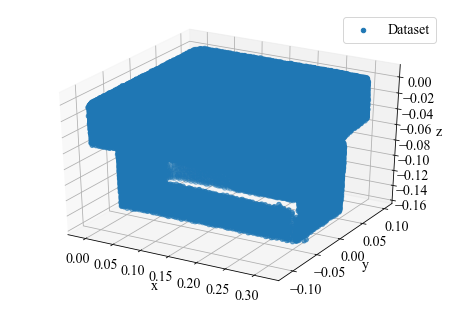

In [3]:
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
xyz_t = xyz.T
ax1.scatter3D(xyz_t[0], xyz_t[1], xyz_t[2] , label='Dataset')
plt.legend()

# グラフを表示する。
plt.show()

5325.0


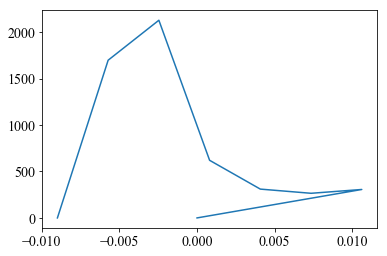

In [63]:
#基準平面の指定
S = "yz"
#精度の指定
d = 100


#基準面yzの場合の処理
x_min, x_max = min(xyz_t[0]), max(xyz_t[0])
#xの1/8と7/8の座標をとる
x_8min, x_8max = x_min + (x_max - x_min)/8, x_min + (x_max - x_min)*7/8
#ある範囲の点の数の平均値
x_age = int(len(xyz)/d)

xidx = x_min
pcd, ix = np.zeros(d + 2), np.zeros(d + 2)
pcdsum = np.zeros(d + 2)

rge = float((x_max - x_min)/d)
k, kk = 0, 0
for i in range(d + 2):
    if k > d*(1/50):
        break
    for x in xyz_t[0]:
        if ((xidx - rge) <= x and x < xidx):
            pcd[i] += 1
    if pcd[i] > x_age:
        kk = 1
    elif (pcd[i] < x_age and kk == 1):
        k += 1
    #if i == 0:
        #pcdsum[i] = pcd[i]
    #else:
        #pcdsum[i] += pcdsum[i-1] + pcd[i]
        
    
    ix[i] = xidx
    xidx += rge

print(sum(pcd))
plt.plot(ix,pcd)
#plt.plot(ix,pcdsum)
